# Image Acquisition

This project starts from image aquisition where the images collected from various sources are read using varies libraries such as sckit-image, opencv etc. The images in this project are collected from two sources. One dataset is collected from a village in Gilgit-Baltistan, Pakistan and the other dataset is taken from Kaggle.

AxesImage(size=(256, 256))


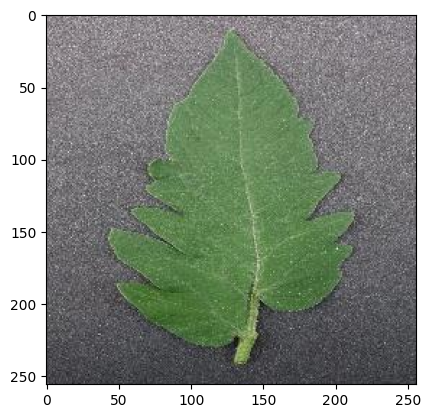

In [70]:
## import the required libraries
import numpy as np
import skimage
import os
from skimage import io
import matplotlib.pyplot as plt
import glob
import cv2


#here i am reading one image from healthy images
healthy_image = "C:/Users/arfan.shah/Desktop/UCA_Undergrad/Arfan_FinalYearProject/dataset1/Tomato___healthy/1.JPG"
healthy = io.imread(healthy_image)
print(plt.imshow(healthy))

#now read one image from 

In [71]:
#her i will read list of images
#this will give us all the directories of all the images in the healthy images folder
h_images = 'C:/Users/arfan.shah/Desktop/UCA_Undergrad/Arfan_FinalYearProject/dataset1/Tomato___healthy/*.JPG'
glob.glob(h_images)

['C:/Users/arfan.shah/Desktop/UCA_Undergrad/Arfan_FinalYearProject/dataset1/Tomato___healthy\\000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG',
 'C:/Users/arfan.shah/Desktop/UCA_Undergrad/Arfan_FinalYearProject/dataset1/Tomato___healthy\\000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1_180deg.JPG',
 'C:/Users/arfan.shah/Desktop/UCA_Undergrad/Arfan_FinalYearProject/dataset1/Tomato___healthy\\000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1_flipTB.JPG',
 'C:/Users/arfan.shah/Desktop/UCA_Undergrad/Arfan_FinalYearProject/dataset1/Tomato___healthy\\000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1_new30degFlipLR.JPG',
 'C:/Users/arfan.shah/Desktop/UCA_Undergrad/Arfan_FinalYearProject/dataset1/Tomato___healthy\\000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1_newPixel25.JPG',
 'C:/Users/arfan.shah/Desktop/UCA_Undergrad/Arfan_FinalYearProject/dataset1/Tomato___healthy\\0031da2a-8edd-468f-a8b1-106657717a32___RS_HL 0105.JPG',
 'C:/Users/arfan.shah/Desktop/

In [36]:
#now we will convert the images into list
healthy_images = [cv2.imread(healthy) for healthy in glob.glob(h_images)]

In [37]:
#now we will find the type of images
#her we can see that the images are convereted successfully into list
type(healthy_images)

list

In [38]:
#her i am finding length of all the images in the list
len(healthy_images)

1926

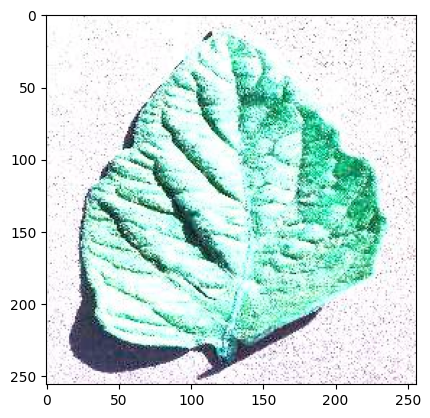

In [39]:
#lets now read one image
plt.imshow(healthy_images[10])

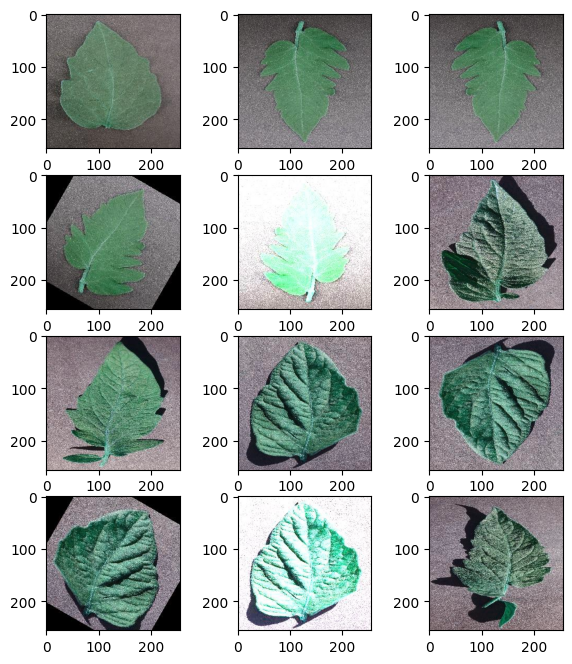

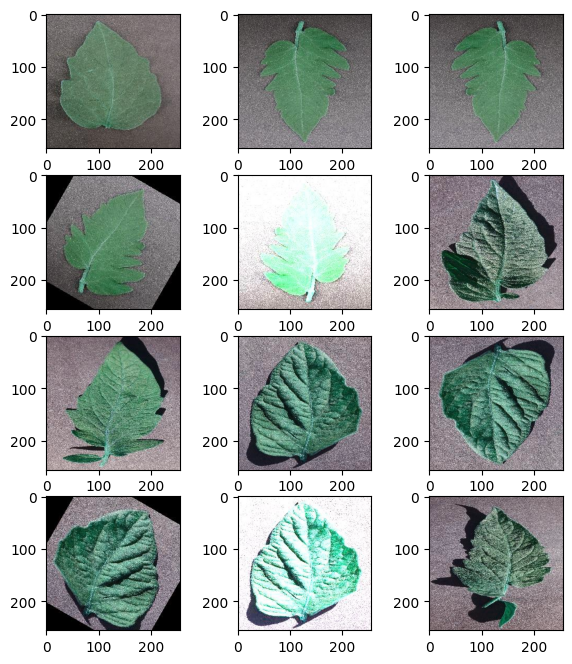

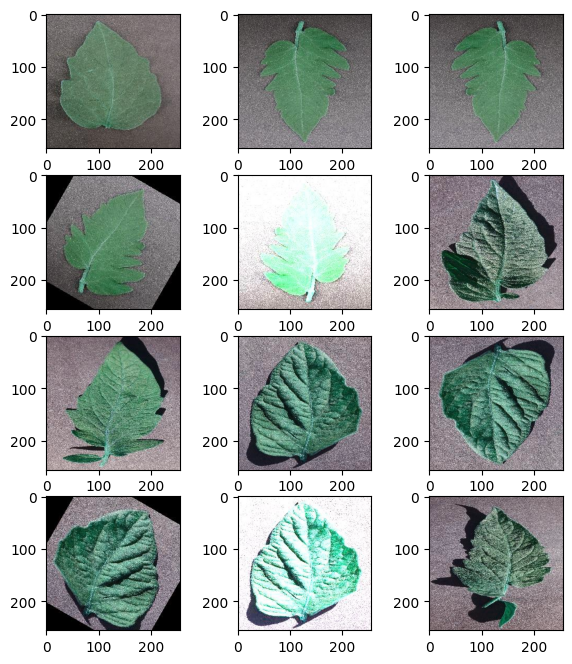

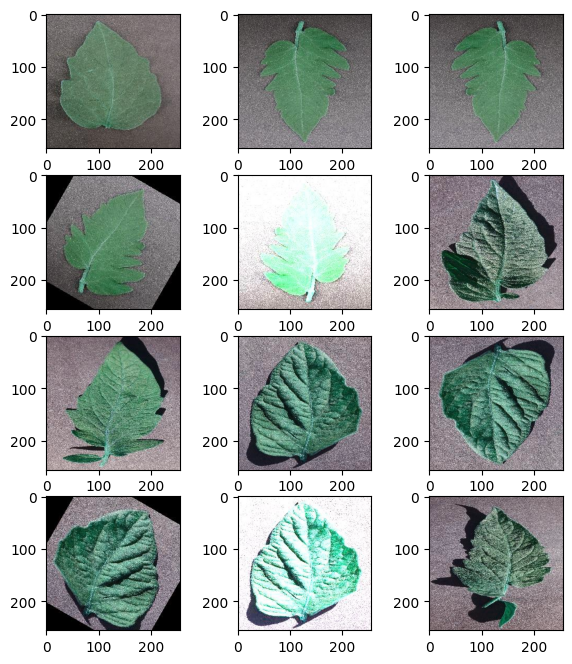

In [40]:
#now lets read a 48 bimages from healthy images at a time
rows = 4
cols = 3

for j in range(0, 48, rows*cols):
    fig = plt.figure(figsize=(7, 8))
    for i in range(0, rows*cols):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(healthy_images[i])
    plt.show()

# Image Pre-Processing

In the pre-processing part we are going to clean the images while applying differentr filters. We will also use image enhancement, image cropping, image resizing techniques.


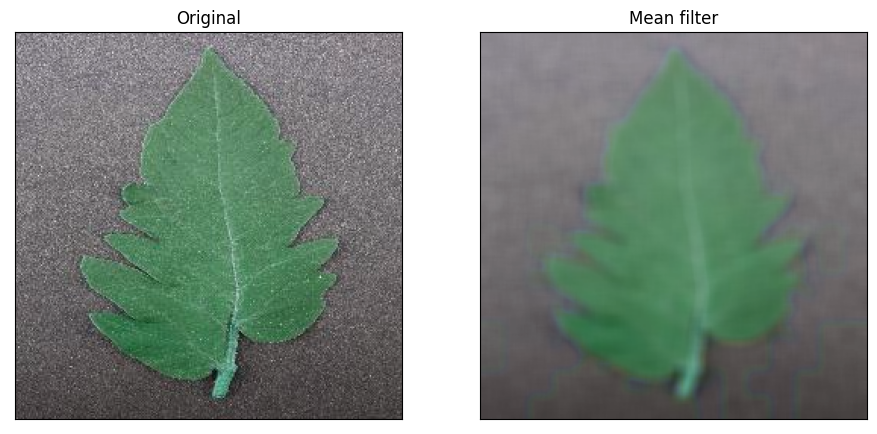

In [43]:
#now lets apply mean filter to reduce noise

from PIL import Image, ImageFilter
%matplotlib inline
#here we are converting HSV
image = cv2.cvtColor(healthy, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
meanFiltered_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(meanFiltered_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

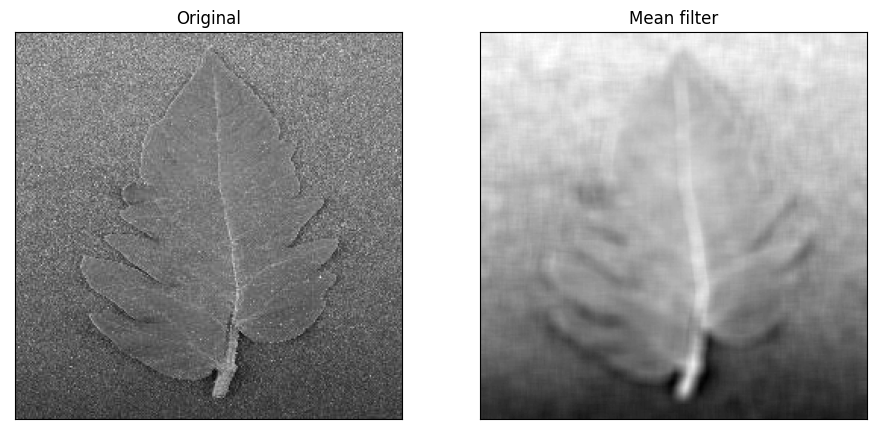

In [74]:
#now lets apply mean filter to the gray scale image

#first lets convert the image into gray scale
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
grayMeanFiltered_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(grayMeanFiltered_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

Hence this shows that some noise has been removed by the mean filter.

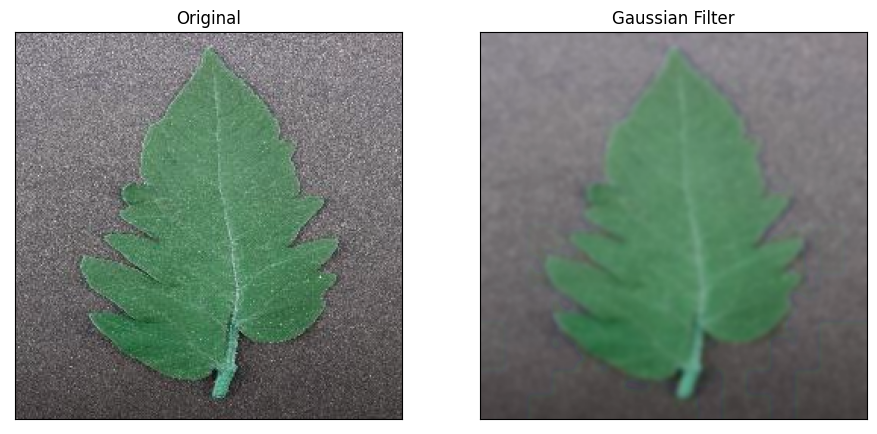

In [75]:
#now lets apply guassian filter
gaussianFiltered_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(gaussianFiltered_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

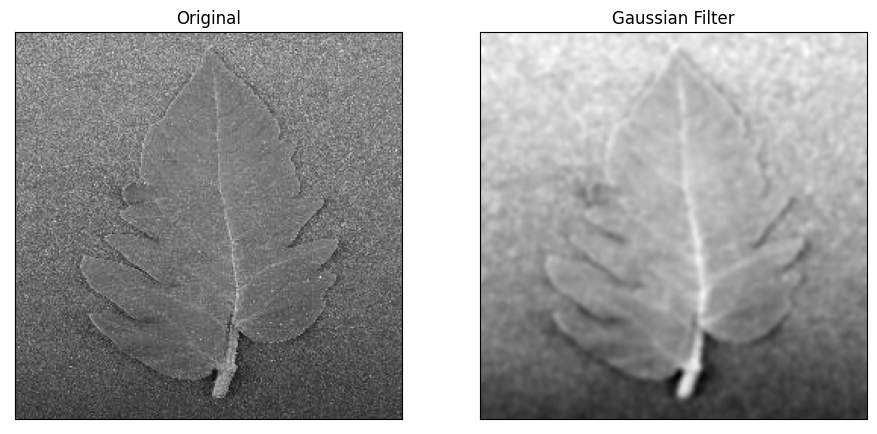

In [78]:
#guassian filter on the gray scale image
gaussianFiltered_grayimage = cv2.GaussianBlur(image2, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gaussianFiltered_grayimage, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

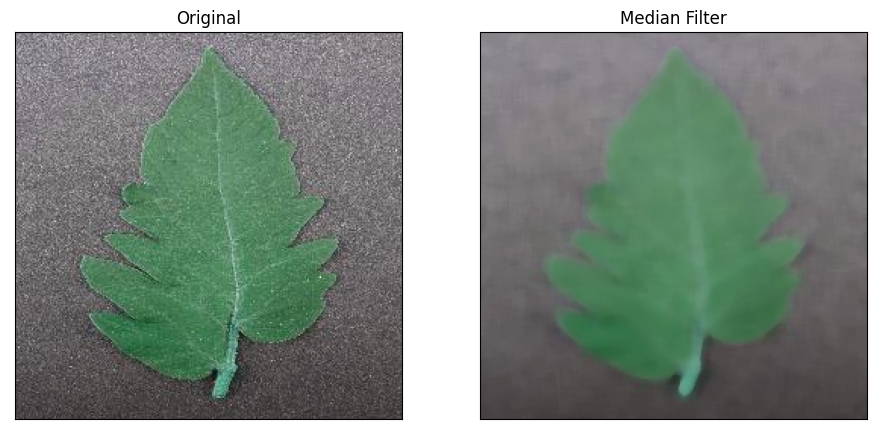

In [79]:
#lets apply median filter which is a non-linear filter
#this median filter can remove salt and pepper noise
medianFiltered_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(medianFiltered_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

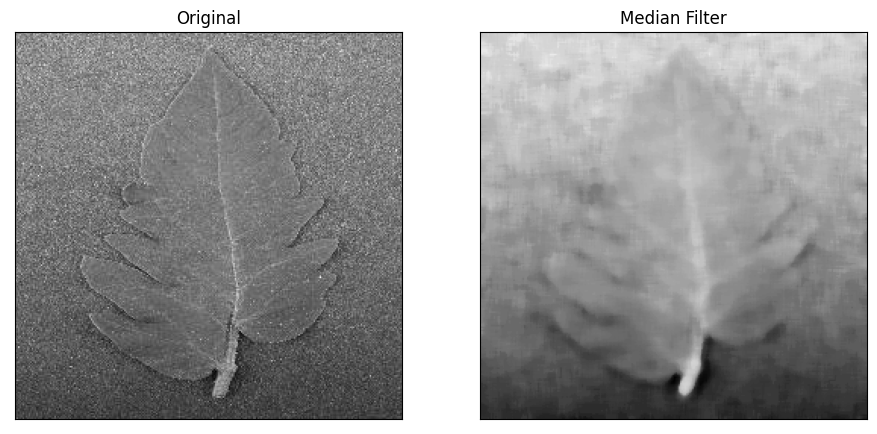

In [80]:
#lets now apply median filter on gray scale image
medianFiltered_grayimage = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(medianFiltered_grayimage, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()